In [1]:
# import das biblioteca necessarias

# import da biblioteca respon´savel por acessar, manipular e análisar dados.
import pandas as pd

# Import da biblioteca responsável por criar varios tipos de gráficos
import seaborn as sns

# Import da biblioteca responsável por criar e manipular gráficos
import matplotlib.pyplot as plt

In [ ]:
# Incêndios Florestais no Brasil: Os incêndios florestais são um grave problema
# para a preservação das Florestas Tropicais. Compreender a frequência de
# incêndios florestais em uma série temporal pode ajudar a tornar medidas
# para evita-los. O Brasil tem a maior floresta tropical do planeta que é
# a floresta.

# Carregando na memória o arquivo csv. Nesse caso foi necessário codificar # o arquivo pro padrão 'latin1' que tem suporte para caracteres especiais.

base_dados = pd.read_csv('Dados_Incendio.csv', encoding='latin1')


In [9]:
print("AS 5 PRIMEIRAS LINHAS DO DATASET")

base_dados.head()

AS 5 PRIMEIRAS LINHAS DO DATASET


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [11]:
print("INFORMAÇÕES GERAIS DO DATASET")

base_dados.info()

INFORMAÇÕES GERAIS DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [12]:
# Para facilitar a nossa análise vamos renomear as colunas do dataset
# O inplace True ira aplicar a renoemação de colunas no dataset carregado
# na memória
base_dados.rename(columns={
    
    'year': 'Ano',
    'state': 'Estado',
    'month':'Mes',
    'number': 'Numero',
    'date':'Data'
}, inplace=True)

In [13]:
print("VERIFICANDO SE OS NOMES DAS COLUNAS FORAM ALTERADOS")

base_dados.columns

VERIFICANDO SE OS NOMES DAS COLUNAS FORAM ALTERADOS


Index(['Ano', 'Estado', 'Mes', 'Numero', 'Data'], dtype='object')

In [14]:
# Podemos verificar essa informação no info, mas, vamos visualizar o total de 
# valores nulos em cada coluna

print("TOTAL DE VALORES NULOS DAS COLUNAS")

base_dados.isnull().sum()

TOTAL DE VALORES NULOS DAS COLUNAS


Ano       0
Estado    0
Mes       0
Numero    0
Data      0
dtype: int64

In [ ]:
# Vamos ver a análise descritiva do dataset
# O método describe irá retornar:
# count: Quantidade de valores de cada coluna. Valores nulos
# não são considerados nessa contagem.
# mean: A média dos valores de cada coluna
# std: O desvio padrão dos valores de cada coluna
# min: O valor minimo de cada coluna
# 25%: 1° quartil representado por 25% dos dados de cada coluna
# 50%: 2° quartil representado por 50% (mediana) dos dados de cada coluna
# 75%: 3° quartil representado por 75% dos dados
# max: O valor máximo de cada coluna.
base_dados.describe()

,Ano,Numero
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [ ]:
print("VERIFICANDO A QUANTIDADE DE VALORES ÚNICOS DO DATASET")

# O metodo nunique serve para contar a quantidade de valores únicos
# de cada coluna.
base_dados.nunique()

VERIFICANDO OS VALORES ÚNICOS DO DATASET


Ano         20
Estado      23
Mes         12
Numero    1479
Data        20
dtype: int64

In [ ]:
print("VERIFICANDO OS VALORES ÚNICOS DO DATASET")

# O método unique tem como objetivo retornar os valores unicos de uma coluna.
# Como o método requer a especificação de uma coluna, vamos utiliza-lo em um
# for para ele percorrer todas as colunas e retornar os valores de todas elas.
for coluna in base_dados:
    
    print("valores únicos da coluna ",coluna, ": ", base_dados[coluna].unique())

VERIFICANDO OS VALORES ÚNICOS DO DATASET
valores únicos da coluna  Ano :  [1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017]
valores únicos da coluna  Estado :  ['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']
valores únicos da coluna  Mes :  ['Janeiro' 'Fevereiro' 'Março' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']
valores únicos da coluna  Numero :  [  0.     10.     12.    ...   2.032 833.    623.   ]
valores únicos da coluna  Data :  ['1998-01-01' '1999-01-01' '2000-01-01' '2001-01-01' '2002-01-01'
 '2003-01-01' '2004-01-01' '2005-01-01' '2006-01-01' '2007-01-01'
 '2008-01-01' '2009-01-01' '2010-01-01' '2011-01-01' '2012-01-01'
 '2013-01-01' '2014-01-01' '2015-01-01' '2016-01-01' '2017-0

In [26]:
print("VERIFICANDO OS TIPOS DE CADA COLUNA")

base_dados.dtypes

VERIFICANDO OS TIPOS DE CADA COLUNA


Ano         int64
Estado     object
Mes        object
Numero    float64
Data       object
dtype: object

In [30]:
# Contando valores infinitos da coluna 'Numero'

print("VERIFICANDO A QUANTIDADE DE VALORES INFINITOS PRESENTES NO DATASET")

print("Quantidade de valores infinitos: ", (base_dados['Numero'] == float('inf')).sum())

VERIFICANDO A QUANTIDADE DE VALORES INFINITOS PRESENTES NO DATASET
Quantidade de valores infinitos:  0


In [31]:
# Verificando se há valores duplicados

print("QUANTIDADE DE VALORES DUPLICADOS")
base_dados.duplicated().sum()

QUANTIDADE DE VALORES DUPLICADOS


32

In [ ]:
# Vamos tentar identificar quantas queimadas tivemos ao longo dos anos

# Vamos agrupar os dados por ano e usar o método sum, para somar o total 
# de queimadas em cada ano.

# Por algum motivo, o agrupamento não estava funcionando muito bem
# já que o sum também estava contando os objects. Então resolvi
# filtrar os tipos que serão selecionados no agrupamento.

# O metodo select_dtypes ira filtrar os tipos de dados que você quer
# utilizar 
colunas_numericas = base_dados.select_dtypes(include=[int, float])

# Agrupamento dos dados por ano. O método reset_index()é usado após o agrupamento para restaurar o índice para o formato padrão (sequencial numérico), já que após o agrupamento, o Anose torna o índice do DataFrame. Ele também move o índice de volta para uma coluna regular, caso necessário."
colunas_numericas.groupby(by=['Ano']).sum().reset_index()


,Ano,Numero
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


Text(0, 0.5, 'Periodo')

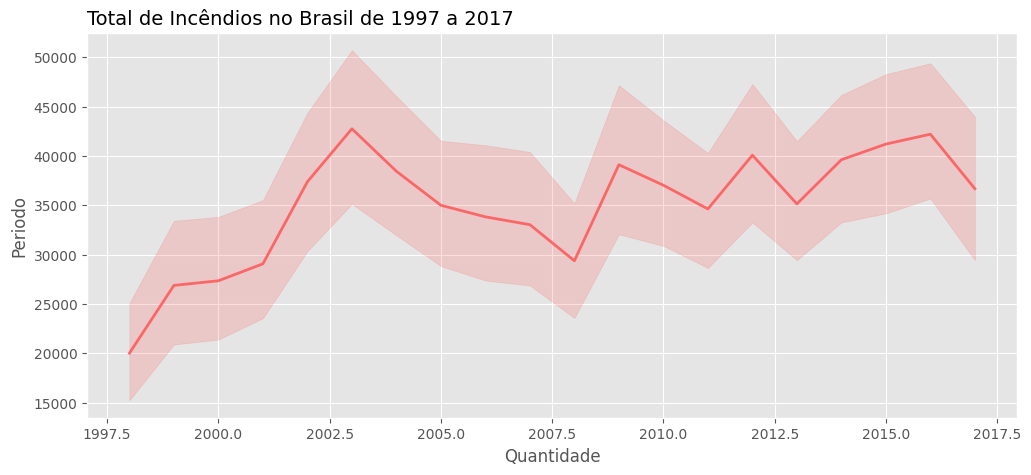

In [54]:
# Agora vamos analisar esse agrupamento usando um grafico de linhas da biblioteca seaborn

# grafico

# Tamanho da imagem do gráfico
plt.figure(figsize=(12,5))

# titulo do gráfico alinhado a esquerda com tamnho 14
plt.title('Total de Incêndios no Brasil de 1997 a 2017', loc='left', fontsize=14)

# Lineplot: Metodo da classe seaborn que plota gráficos de linhas
# data: base de dados análisada
# x: valor do eixo x do gráfico (no nosso caso será a coluna 'Numero')
# y: valor do eixo y do gráfico (no nosso caso será a coluna 'Ano)
# color: cor da linha do grafico
# lw: largura da linha do gráfico
# alpha: define a transparência da linha
# estimator: Serve para agregar dados 

sns.lineplot(data=colunas_numericas, x='Ano', y='Numero', estimator='sum', lw=2, color = '#ff5555', alpha = 0.85)

# rótulo do eixo x
plt.xlabel('Quantidade')

# Rótulo do eixo y
plt.ylabel('Periodo')

C:\Users\caike\AppData\Local\Temp\ipykernel_10132\1156748908.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=analise_boxplot, x = 'Mes', y = 'Numero',palette='coolwarm', saturation=1, width=0.5, linewidth=2, order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])


Text(0, 0.5, 'Número de Incêndios')

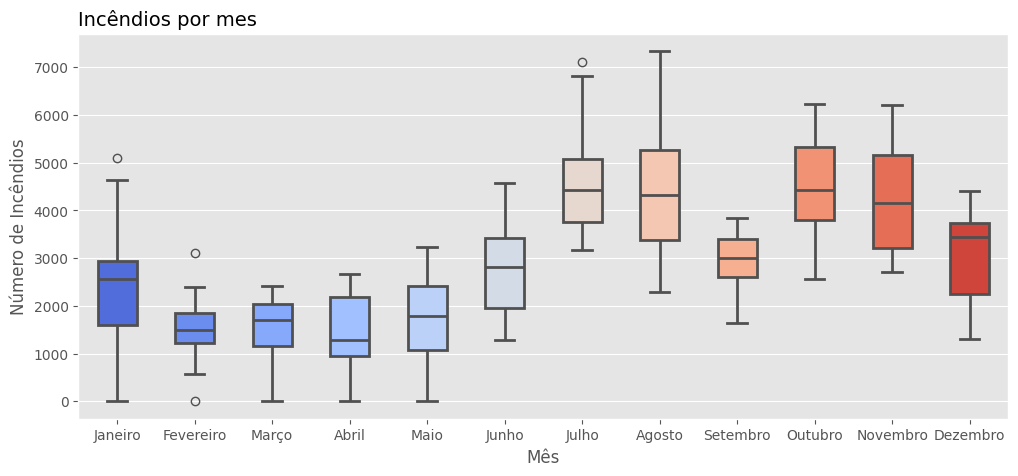

In [86]:
# Vamos usar um boxplot para verificar qual mes possuiu o maior numero de queimadas
# Primeiro vamos agrupar os dados por mes e ano
analise_boxplot = base_dados.groupby(by= ['Ano', 'Mes']).sum().reset_index()

# Agora que já agrupamos, vamos criar o grafico boxplot

# Tamanho da imagem do gráfico
plt.figure(figsize=(12,5))

# Titulo do grafico alinhado a esquerda com tamanho 14
plt.title('Incêndios por mes', loc='left', fontsize=14)

# Criação do boxplot
# boxplot: metodo seaborn que cria graficos boxplots
# data: Base de dados análisada
# x: valores do eixo x: valores da coluna 'Mes'
# y: Valores do eixo Y: Valores da coluna 'Ano'.
# order: serve para ordenar dados categóricos (rótulos, textos, etc) na ordem
# que acharmos melhor, nesse caso, vamos utlizar para ordenar os meses no
# eixo x. 
# pallete: ira definir a paleta de cores
# saturation: Irá definir a saturação das cores
# width: define a largura das caixas 
# linewidth: define a largura das linhas que formam o contorno das caixas

sns.boxplot(data=analise_boxplot, x = 'Mes', y = 'Numero',palette='coolwarm', saturation=1, width=0.5, linewidth=2, order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])


# Rótulos do eixo x
plt.xlabel('Mês')

# Rótulo do eixo y
plt.ylabel('Número de Incêndios')

